In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
studentsDS = '../data/sample-files/USCI/st-perf-10000.csv'
extraActivities  = 'Extracurricular Activities'

df = pd.read_csv(studentsDS)
df[extraActivities] = df[extraActivities].map(lambda x: 1 if str.lower(x) == 'yes' else 0)

print(df[extraActivities].head())
# print(encoded.head())
# print(ds.info())
# print(encoded.describe())


0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64


In [3]:


tempDs = df.loc[:10]
standardScaler = StandardScaler()


stadardScaled = standardScaler.fit_transform(tempDs)
stadardScaled = pd.DataFrame(stadardScaled, columns=tempDs.columns)


minMaxScaler = MinMaxScaler()
minMaxScaled = minMaxScaler.fit_transform(tempDs)
minMaxScaled = pd.DataFrame(minMaxScaled,columns=tempDs.columns)


In [4]:
print(tempDs.head())
print(stadardScaled.head())
print(minMaxScaled.head())
print(minMaxScaled.describe())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1                 91  
1                                 2                 65  
2                                 2                 45  
3                                 2                 36  
4                                 5                 66  
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.568796         1.504014                    1.095445     1.439748   
1      -1.137593         0.488669

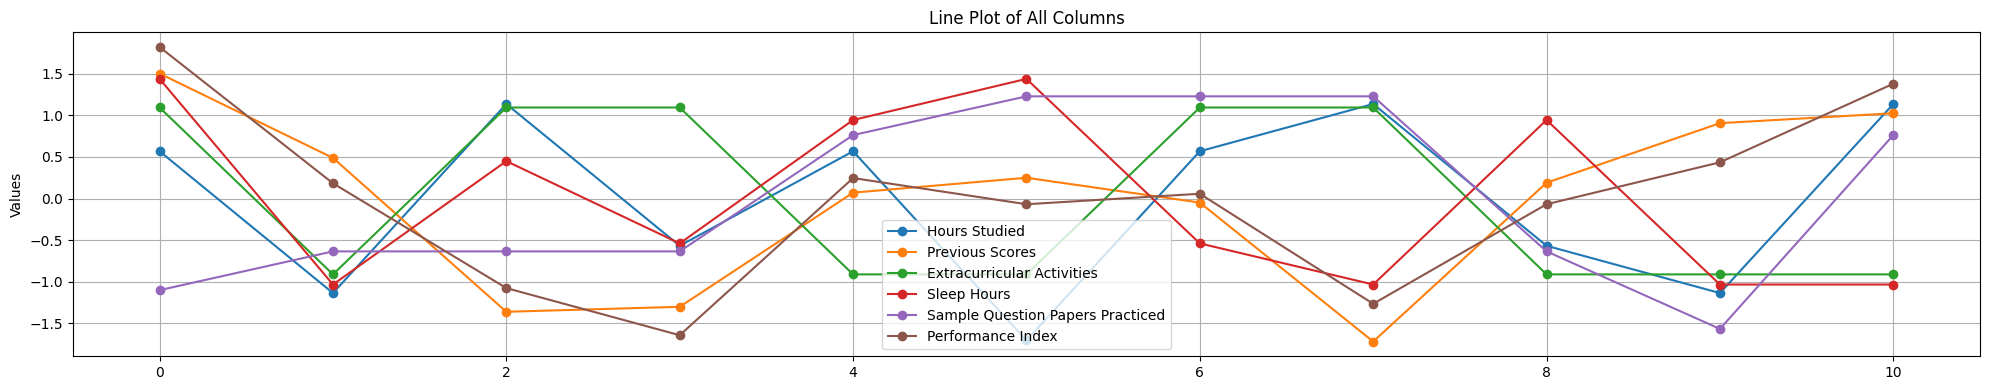

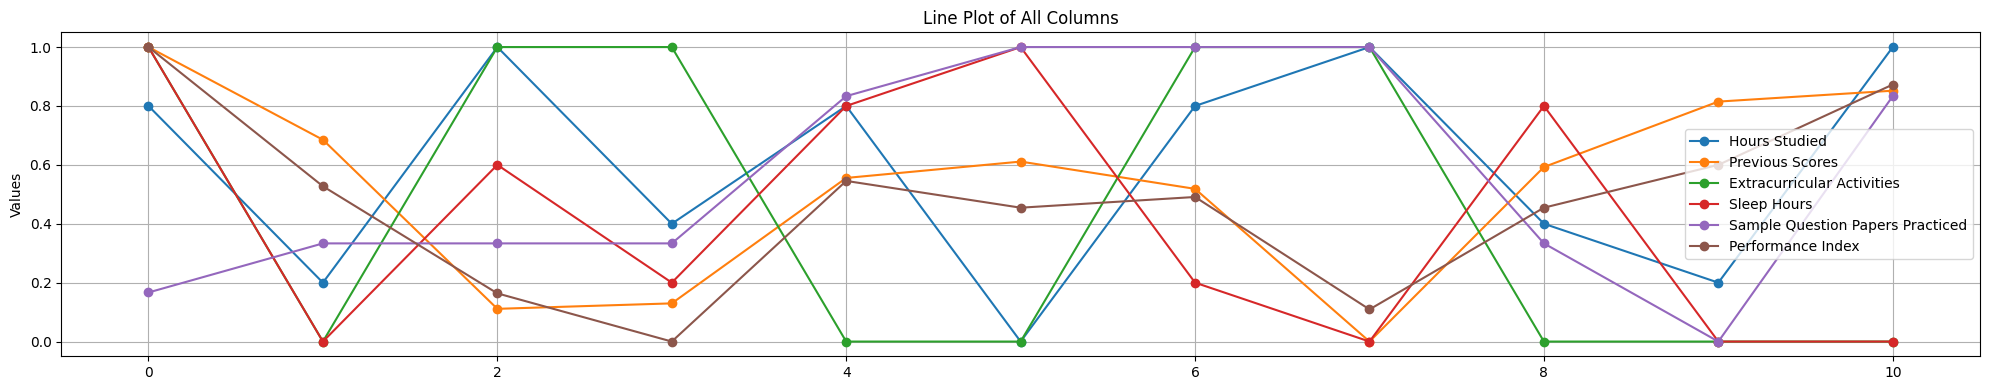

In [5]:



# Optional: Set index if there's an 'Index' or 'Time' column
# if 'Index' in stadardScaled.columns:
#     stadardScaled.set_index('Index', inplace=True)

# Plot all columns
plt.figure(figsize=(20, 4))
for column in stadardScaled.columns:
    plt.plot(stadardScaled.index, stadardScaled[column], marker='o', label=column)

plt.title("Line Plot of All Columns")
# plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot all columns
plt.figure(figsize=(20, 4))
for column in minMaxScaled.columns:
    plt.plot(minMaxScaled.index, minMaxScaled[column], marker='o', label=column)

plt.title("Line Plot of All Columns")
# plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

studentsDS = '../data/sample-files/USCI/st-perf-10000.csv'
extraActivities = 'Extracurricular Activities'
y_train_column = 'Performance Index'

# Load data
df = pd.read_csv(studentsDS)

# Encode 'Extracurricular Activities' as binary
df[extraActivities] = df[extraActivities].map(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Separate target and features BEFORE scaling
y_raw = df[[y_train_column]]  # keep it as DataFrame to scale later
X_raw = df.drop(columns=[y_train_column])

# Scale features
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X_raw)
X = pd.DataFrame(X_scaled, columns=X_raw.columns)


# Scale target
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y_raw)
y = pd.Series(y_scaled.flatten(), name=y_train_column)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=242)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=242)

# Print shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_cv:", X_cv.shape)
print("y_cv:", y_cv.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)




X_train: (6000, 5)
y_train: (6000,)
X_cv: (2000, 5)
y_cv: (2000,)
X_test: (2000, 5)
y_test: (2000,)


In [7]:
def applyPolynomial(x, degree=1):
    poly_features = []

    for i in range(len(x)):
        for d in range(1, degree + 1):
            poly_features.append(x[i] ** d)
    return poly_features

In [8]:
import numpy as np

def predict(x, w, b, degree=1):
    x = np.asarray(x).flatten()
    poly_features = applyPolynomial(x, degree)
    poly_features = np.array(poly_features)
    y_hat = np.dot(poly_features, w) + b

    return y_hat, poly_features

In [9]:


def linear_regression(X, w, b, degree=1):
    y_hats = []
    for i in range(X.shape[0]):
        x = X[i]
        y_hat,_ = predict(x, w, b, degree)
        y_hats.append(y_hat)        

    return y_hats


In [10]:
def compute_lr_cost(X, y, w, b, degree=1):
    y_hats = linear_regression(X, w, b, degree)

    total_error = 0
    for i in range(len(y)):
        total_error += (y_hats[i] - y[i]) ** 2

    cost = total_error / (2 * len(y))
    return cost


In [11]:
def gradient_descent(X, y, w, b, a, degree=2):
    w_sum = w_sum = np.zeros_like(w, dtype=float) 
    b_sum = 0
    m = len(y)
    for i in range(len(y)):
        x = X[i]
        true_y = y[i]
        y_hat, poly_features = predict(x, w, b, degree)
        

        error = y_hat - true_y
        b_sum += error
        w_sum +=  error * poly_features

    w = w - (a * (1 * w_sum / m))
    b = b - (a * (1 * b_sum / m))

    return (w,b)


In [12]:
def reduce_cost(X, y, w, b, a, epochs=3000, degree=1):
    
    minB =100
    minW=100
    minCost=100

    for i in range(epochs):
        w,b = gradient_descent(X, y, w, b, a, degree)

        if (i + 1) % 10 == 0 or i == 0 or i == epochs - 1:           
            
            print('Iteration ' + str(i+1) )
            cost = compute_lr_cost(X, y, w, b, degree)
            print('complete cost='+str(cost))
            if(cost < minCost):
                
                minW = w
                minB = b
                minCost = cost

                print('b='+str(b))
                print('w='+str(np.sum(w)))
                print(w)
                print('cost='+str(cost))
                print('cost='+str(cost*100))
                print('=========================')
            

            
            

    return minW,minB


Iteration 1
complete cost=0.9700450182109145
b=0.9900015696980478
w=0.03883231906892672
[0.01115459 0.01687448 0.00646864 0.00332895 0.00100566]
cost=0.9700450182109145
cost=97.00450182109145
Iteration 10
complete cost=0.8110358310269292
b=0.9043967598486407
w=0.15523814265358268
[0.04381932 0.09406601 0.00722442 0.00717444 0.00295395]
cost=0.8110358310269292
cost=81.10358310269292
Iteration 20
complete cost=0.66491441271996
b=0.8179341378411473
w=0.27288223065149364
[0.07678973 0.1721104  0.00800291 0.01101303 0.00496616]
cost=0.66491441271996
cost=66.491441271996
Iteration 30
complete cost=0.5453054002487936
b=0.7397380542155166
w=0.3793466465552861
[0.10658717 0.24276864 0.00872121 0.01444135 0.00682828]
cost=0.5453054002487936
cost=54.53054002487936
Iteration 40
complete cost=0.44739809124301794
b=0.6690180278881891
w=0.47569355296323435
[0.13351694 0.3067397  0.00938354 0.01750279 0.00855059]
cost=0.44739809124301794
cost=44.73980912430179
Iteration 50
complete cost=0.367254739280

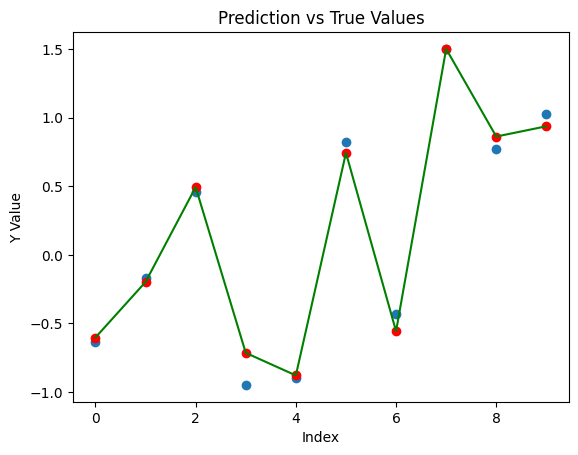

MSE: 0.011306387227013128
R² score: 0.988689833560998


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

degree = 1
b = 1
a = 0.01
w = np.random.rand(degree * X_train.shape[1]) * 0.01


epochs = 800
training_sample_size = 6000


X_train_sample = X_train[:training_sample_size].to_numpy()
y_train_sample = y_train[:training_sample_size].to_numpy()
w, b = reduce_cost(X_train_sample, y_train_sample, w, b, a, epochs, degree)


cost = compute_lr_cost(X_train_sample,y_train_sample,w,b,degree)
y_hats = linear_regression(X_train_sample,w,b,degree)

print('Cost:\t\t'+str(cost))
print('Cost:\t\t'+str(cost*100))

plottingSample = 10

plt.scatter(range(plottingSample), y_train_sample[:plottingSample], label='True Y')
plt.scatter(range(plottingSample), y_hats[:plottingSample],color='red' )
plt.plot(range(plottingSample), y_hats[:plottingSample], label='Predicted Y (Line)', color='green')
plt.title('Prediction vs True Values')
plt.xlabel('Index')
plt.ylabel('Y Value')
# plt.legend()
plt.show()

cost = compute_lr_cost(X_train_sample,y_train_sample,w,b,degree)
mse = mean_squared_error(y_train_sample,y_hats)
r2 = r2_score(y_train_sample,y_hats)

print("MSE:", mse)
print("R² score:", r2)

Cost:		0.007322882859827512
Cost:		0.7322882859827512


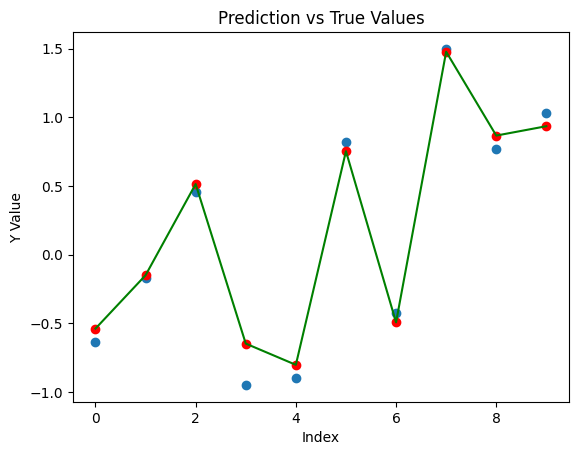

In [24]:

# degree = 6
# # After 20000 epochs with a=0.3545 & degree=6
# cost=0.007322882640904318
b=0.040531321684799
w = [0.37136613, 0.88021927, 0.01597983, 0.0416814,  0.02687384]

X_train_sample = X_train[:training_sample_size].to_numpy()
y_train_sample = y_train[:training_sample_size].to_numpy()
cost = compute_lr_cost(X_train_sample,y_train_sample,w,b,degree)
y_hats = linear_regression(X_train_sample,w,b,degree)

print('Cost:\t\t'+str(cost))
print('Cost:\t\t'+str(cost*100))


# print(y_train_sample_100)
# print(y_hats)
plottingSample = 10

plt.scatter(range(plottingSample), y_train_sample[:plottingSample], label='True Y')
plt.scatter(range(plottingSample), y_hats[:plottingSample],color='red' )
plt.plot(range(plottingSample), y_hats[:plottingSample], label='Predicted Y (Line)', color='green')
plt.title('Prediction vs True Values')
plt.xlabel('Index')
plt.ylabel('Y Value')
# plt.legend()
plt.show()